### DİOMANDS

Burada incelenen veri setinde seaborn kütüphanesinde hazır bulunan diamonds seti üzerinde incelemeler yapılacaktır.
Öncelikle kütüphaneyi import etmemiz gerekmektedir.

In [1]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds') #data setini yükleme işlemini yapıyoruz.
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df.info() #dataseti hakkında bilgi almamızı sağlar.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [3]:
df.describe().T 
#Pivot tablo oluşturmada kolaylık sağlar, T ise transpozunu almamızı sağlar.

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [4]:
# veri setimizde eksik değer var mı, var ise hangi değişkende kaç tane olduğunu bulmak istiyorsak aşağıdaki kodları yazmalıyız.
df.isnull().values.any()

False

In [5]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
df.groupby(["price"])[["carat"]].aggregate("mean").unstack()

       price
carat  326      0.22
       327      0.23
       334      0.29
       335      0.31
       336      0.24
                ... 
       18803    2.00
       18804    2.07
       18806    1.51
       18818    2.00
       18823    2.29
Length: 11602, dtype: float64

In [7]:
df.pivot_table("price", index="carat", columns= "color")

color,D,E,F,G,H,I,J
carat,,,,,,,
0.20,367.000000,364.250000,367.000000,NaN,NaN,NaN,NaN
0.21,386.000000,375.600000,NaN,NaN,NaN,NaN,NaN
0.22,404.000000,370.500000,406.000000,NaN,NaN,NaN,NaN
0.23,493.355556,497.133858,493.013158,447.931034,421.230769,414.0,340.0
0.24,509.214286,504.726190,523.292135,497.347826,473.045455,412.5,384.0
...,...,...,...,...,...,...,...
4.00,NaN,NaN,NaN,NaN,NaN,15984.0,NaN
4.01,NaN,NaN,NaN,NaN,NaN,15223.0,15223.0
4.13,NaN,NaN,NaN,NaN,17329.000000,NaN,NaN


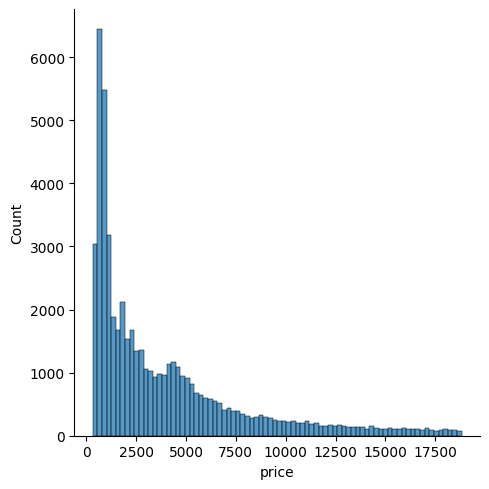

In [9]:
sns.displot(df.price, kde=False);  # histogram grafiği

C:\Users\nurcu\AppData\Local\Temp\ipykernel_14180\745425449.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.price, shade=True) # yoğunluk grafiği oluşturur.


<AxesSubplot: xlabel='price', ylabel='Density'>

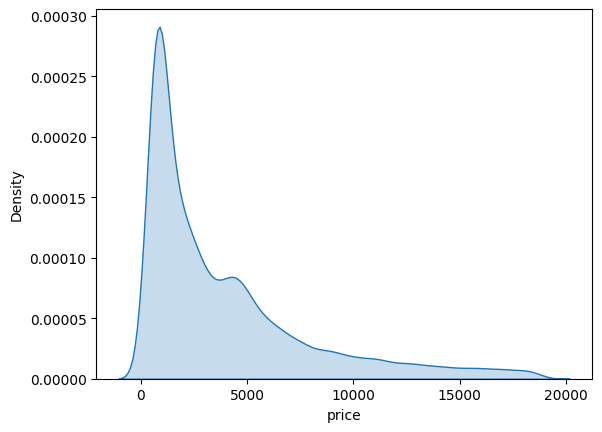

In [14]:
sns.kdeplot(df.price, shade=True) # yoğunluk grafiği oluşturur.

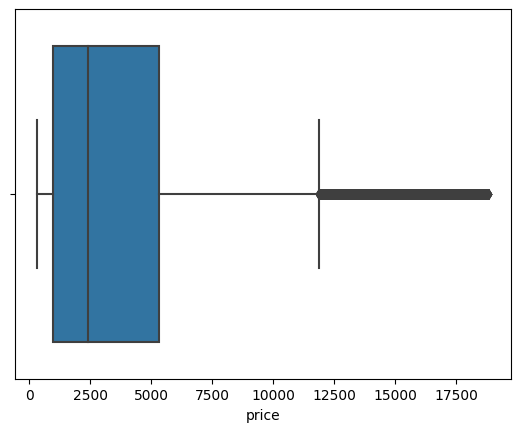

In [18]:
sns.boxplot(x = df["price"], orient="V"); 
#kutu grafik

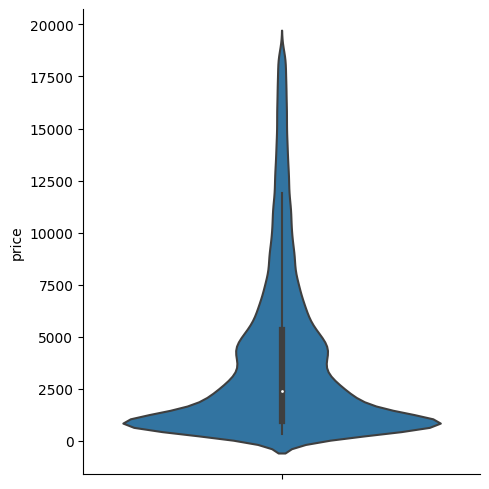

In [19]:
sns.catplot(y="price", kind="violin", data=df); #violin grafik oluşturma.

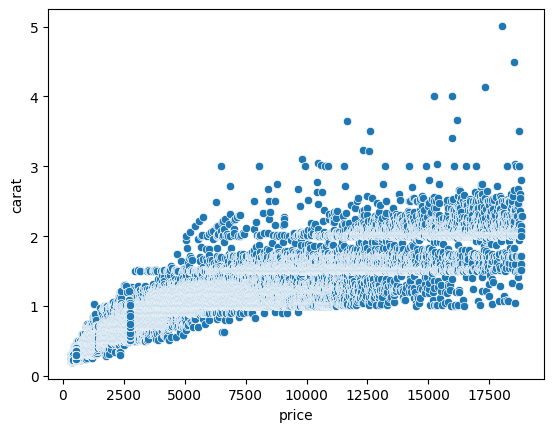

In [20]:
sns.scatterplot(x="price", y = "carat", data=df); #korealsyon grafik oluşturma.

In [25]:
import seaborn as sns
flights = sns.load_dataset('flights')
df =flights.copy()
df.head()
#ısı grafiği oluşturmak için flights veri setini kullandım.

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


C:\Users\nurcu\AppData\Local\Temp\ipykernel_14180\1773406090.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df= df.pivot("month","year","passengers")


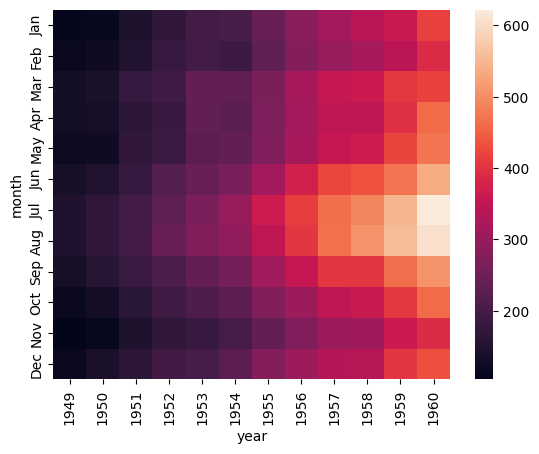

In [29]:
df= df.pivot("month","year","passengers")
sns.heatmap(df); 

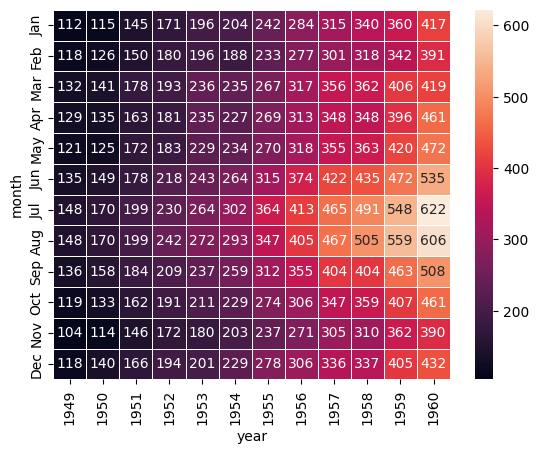

In [30]:
sns.heatmap(df,annot=True, fmt="d", linewidths=0.5); 

Okuduğunuz için teşekkür ederim.